# **Praktikum Modul 3**

**Mochamad Zidan Hadipratama, 5027221052**

In [1]:
# Mengimpor pustaka yang diperlukan
import numpy as np  # Untuk operasi numerik
import pandas as pd  # Untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Untuk membuat grafik
import seaborn as sns  # Untuk visualisasi data statistik
from sklearn.preprocessing import LabelEncoder  # Untuk mengkodekan variabel kategori
from sklearn.preprocessing import MinMaxScaler  # Untuk penskalaan fitur min-max
from sklearn.preprocessing import StandardScaler  # Untuk standarisasi fitur
from sklearn.feature_selection import (
    RFE,
)  # Recursive Feature Elimination untuk pemilihan fitur
from sklearn.linear_model import LinearRegression  # Model regresi linear
from sklearn.impute import SimpleImputer  # Untuk mengisi nilai yang hilang
from sklearn.decomposition import (
    PCA,
)  # Principal Component Analysis untuk reduksi dimensi

## **Nomor 2**

Jarang
Kebidanan
Sains
Laki-laki
Perawat
Belum Menikah
Tidak
Ya


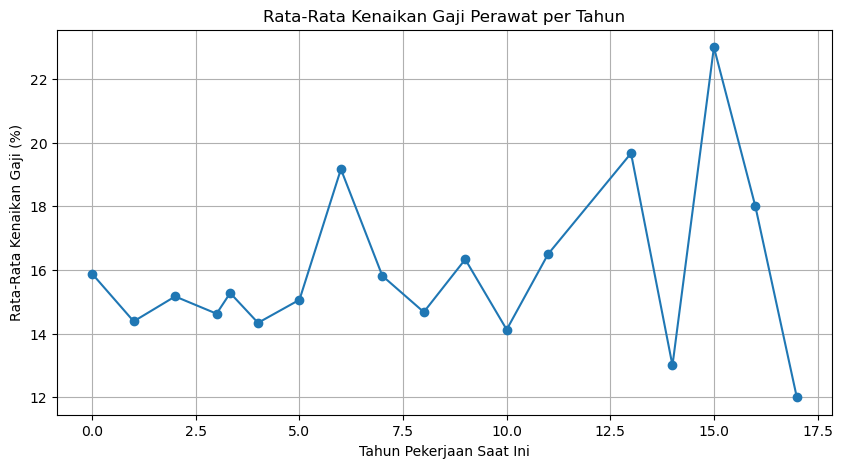

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('train.csv')

for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

data_perawat = df[df['Peran_Pekerjaan'] == 'Perawat']

rata_rata_per_tahun = data_perawat.groupby('Tahun_Pekerjaan_Saat_Ini')['Kenaikan_Gaji_Persen'].mean()

plt.figure(figsize=(10,5))
plt.plot(rata_rata_per_tahun.index, rata_rata_per_tahun.values, marker='o')
plt.title('Rata-Rata Kenaikan Gaji Perawat per Tahun')
plt.xlabel('Tahun Pekerjaan Saat Ini')
plt.ylabel('Rata-Rata Kenaikan Gaji (%)')
plt.grid(True)
plt.show()

## **Nomor 3**

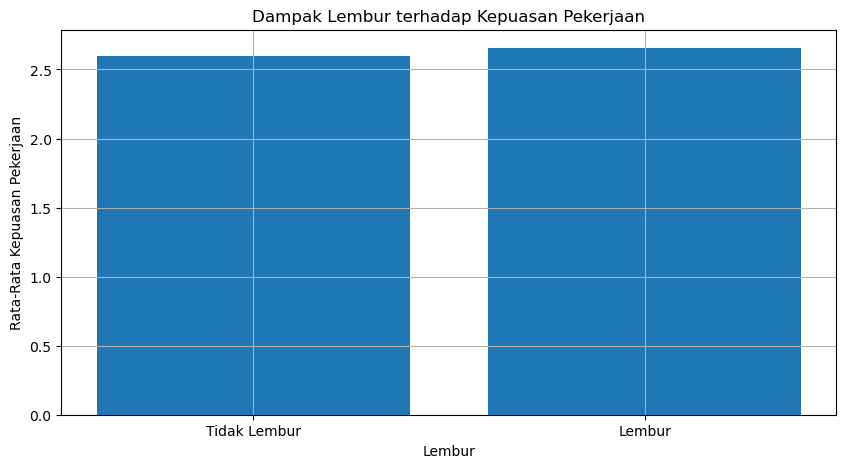

In [3]:
df['Lembur_numerik'] = df['Lembur'].apply(lambda x: 1 if x == 'Ya' else 0)

rata_rata_kepuasan = df.groupby('Lembur_numerik')['Kepuasan_Pekerjaan'].mean()

plt.figure(figsize=(10,5))
plt.bar(['Tidak Lembur', 'Lembur'], rata_rata_kepuasan.values)
plt.title('Dampak Lembur terhadap Kepuasan Pekerjaan')
plt.xlabel('Lembur')
plt.ylabel('Rata-Rata Kepuasan Pekerjaan')
plt.grid(True)
plt.show()

## **Nomor 4**

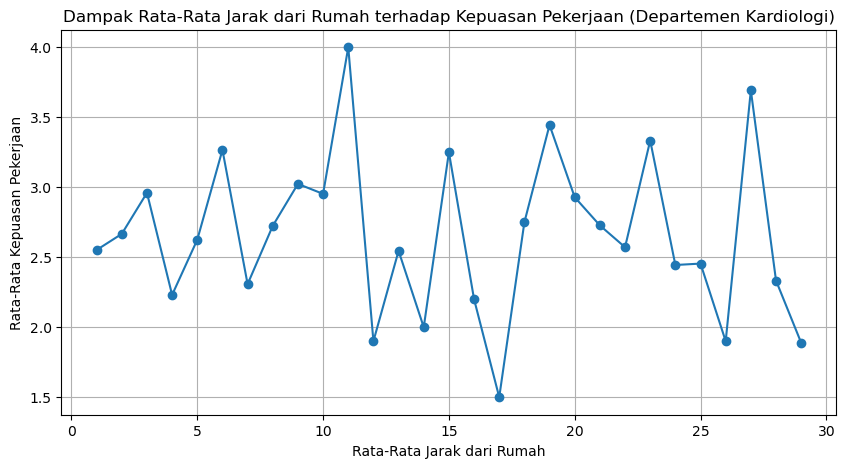

In [4]:
data_depart = df[df['Departemen'] == 'Kardiologi']

rata_rata_kepuasan = data_depart.groupby('Jarak_dari_Rumah')['Kepuasan_Pekerjaan'].mean()

plt.figure(figsize=(10,5))
plt.plot(rata_rata_kepuasan.index, rata_rata_kepuasan.values, marker='o')
plt.title('Dampak Rata-Rata Jarak dari Rumah terhadap Kepuasan Pekerjaan (Departemen Kardiologi)')
plt.xlabel('Rata-Rata Jarak dari Rumah')
plt.ylabel('Rata-Rata Kepuasan Pekerjaan')
plt.grid(True)
plt.show()

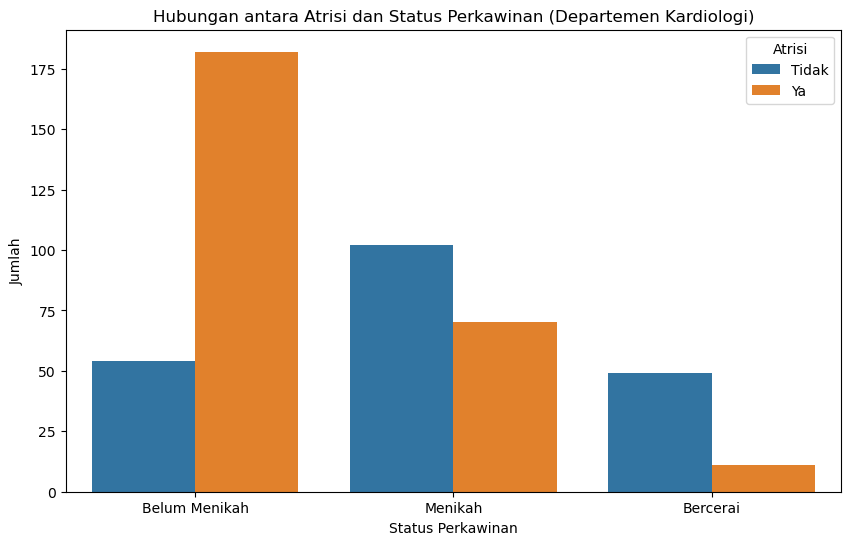

In [5]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Status_Perkawinan', hue='Atrisi', data=data_depart)

plt.title('Hubungan antara Atrisi dan Status Perkawinan (Departemen Kardiologi)')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah')
plt.show()


## **Nomor 5**

In [6]:
rata_rata_umur = df['Usia'].mean()

print(f"Rata-rata umur: {rata_rata_umur} tahun.")

Rata-rata umur: 34.19214586255259 tahun.


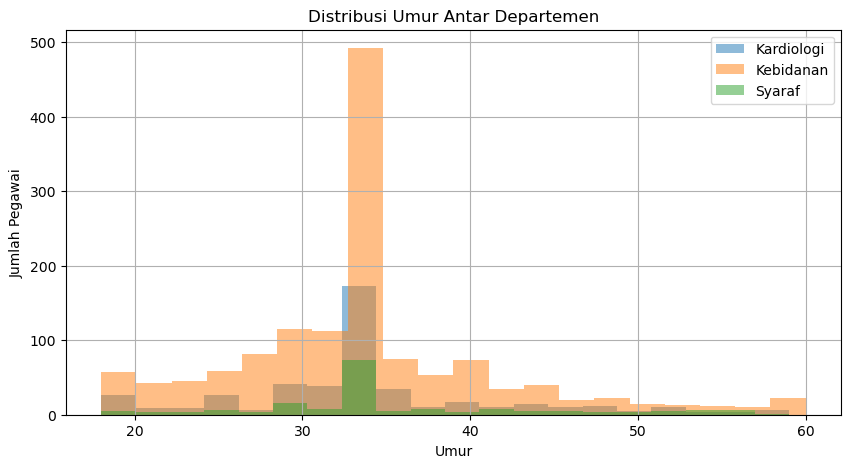

In [7]:
plt.figure(figsize=(10,5))

for departemen in df['Departemen'].unique():
    data_departemen = df[df['Departemen'] == departemen]
    plt.hist(data_departemen['Usia'], bins=20, alpha=0.5, label=departemen)

plt.legend()

plt.title('Distribusi Umur Antar Departemen')
plt.xlabel('Umur')
plt.ylabel('Jumlah Pegawai')
plt.grid(True)
plt.show()

## **Nomor 6**

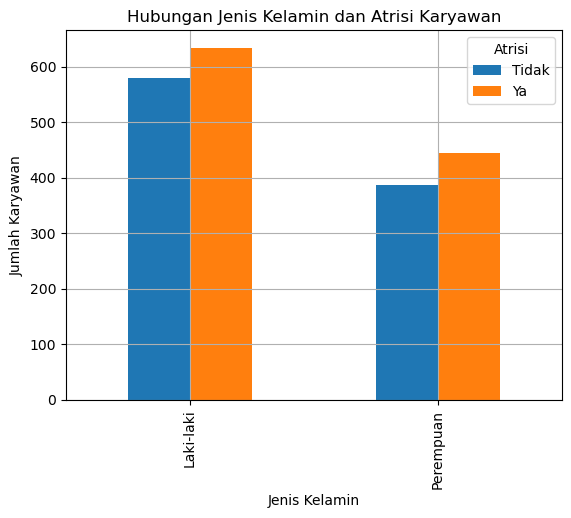

In [8]:
atrisi_jenis_kelamin = df.groupby('Jenis_Kelamin')['Atrisi'].value_counts()

atrisi_jenis_kelamin.unstack().plot(kind='bar', stacked=False)
plt.title('Hubungan Jenis Kelamin dan Atrisi Karyawan')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah Karyawan')
plt.grid(True)
plt.show()

## **Nomor 7**

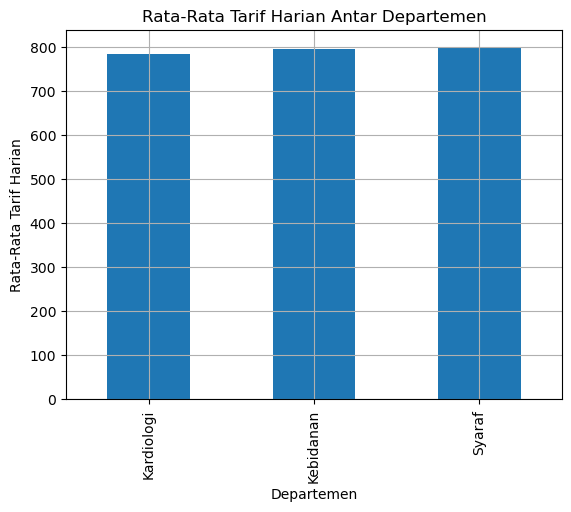

In [9]:
rata_rata_tarif = df.groupby('Departemen')['Tarif_Harian'].mean()

rata_rata_tarif.plot(kind='bar')
plt.title('Rata-Rata Tarif Harian Antar Departemen')
plt.xlabel('Departemen')
plt.ylabel('Rata-Rata Tarif Harian')
plt.grid(True)
plt.show()

## **Nomor 8**

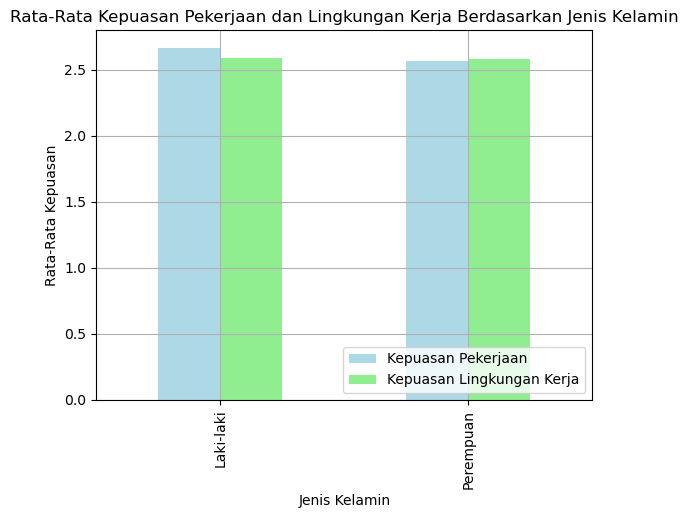

In [10]:
rata_rata_kepuasan_pekerjaan = df.groupby('Jenis_Kelamin')['Kepuasan_Pekerjaan'].mean()
rata_rata_kepuasan_lingkungan = df.groupby('Jenis_Kelamin')['Kepuasan_Lingkungan_Kerja'].mean()

rata_rata_kepuasan = pd.DataFrame({
    'Kepuasan Pekerjaan': rata_rata_kepuasan_pekerjaan,
    'Kepuasan Lingkungan Kerja': rata_rata_kepuasan_lingkungan
})

rata_rata_kepuasan.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Rata-Rata Kepuasan Pekerjaan dan Lingkungan Kerja Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-Rata Kepuasan')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

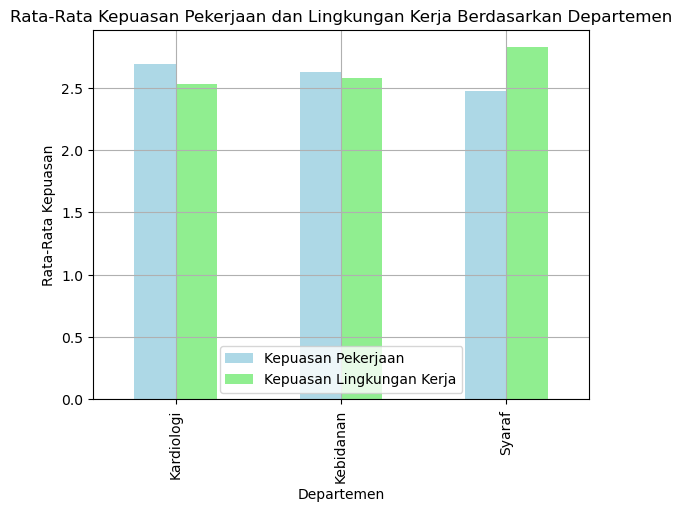

In [11]:
rata_rata_kepuasan_pekerjaan = df.groupby('Departemen')['Kepuasan_Pekerjaan'].mean()
rata_rata_kepuasan_lingkungan = df.groupby('Departemen')['Kepuasan_Lingkungan_Kerja'].mean()

rata_rata_kepuasan = pd.DataFrame({
    'Kepuasan Pekerjaan': rata_rata_kepuasan_pekerjaan,
    'Kepuasan Lingkungan Kerja': rata_rata_kepuasan_lingkungan
})

rata_rata_kepuasan.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Rata-Rata Kepuasan Pekerjaan dan Lingkungan Kerja Berdasarkan Departemen')
plt.xlabel('Departemen')
plt.ylabel('Rata-Rata Kepuasan')
plt.grid(True)
plt.show()

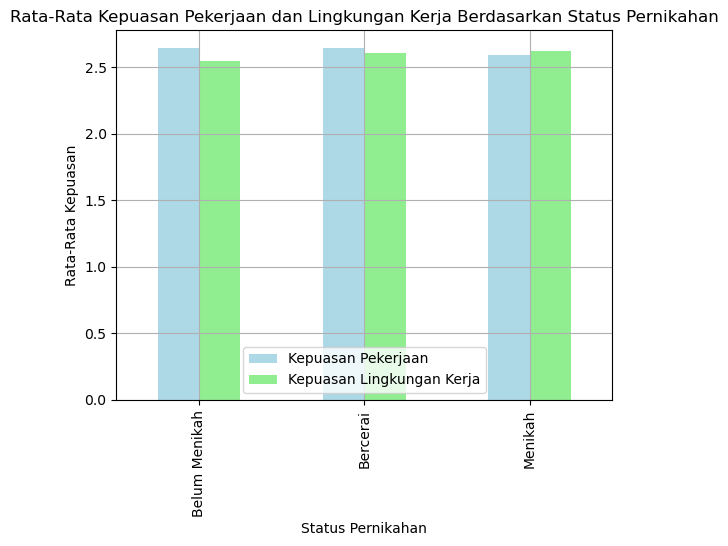

In [12]:
rata_rata_kepuasan_pekerjaan = df.groupby('Status_Perkawinan')['Kepuasan_Pekerjaan'].mean()
rata_rata_kepuasan_lingkungan = df.groupby('Status_Perkawinan')['Kepuasan_Lingkungan_Kerja'].mean()

rata_rata_kepuasan = pd.DataFrame({
    'Kepuasan Pekerjaan': rata_rata_kepuasan_pekerjaan,
    'Kepuasan Lingkungan Kerja': rata_rata_kepuasan_lingkungan
})

rata_rata_kepuasan.plot(kind='bar', color=['lightblue', 'lightgreen'])
plt.title('Rata-Rata Kepuasan Pekerjaan dan Lingkungan Kerja Berdasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.ylabel('Rata-Rata Kepuasan')
plt.grid(True)
plt.show()


## **Nomor 1**

### XBG Model

In [8]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')

for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        # print("-------", column, "---------")
        # print(train_data[column])
        train_data[column] = label_encoder.fit_transform(train_data[column])
        # print("-------", column, "---------")
        # print(train_data[column])

X_train = train_data.drop('Atrisi', axis=1)
y_train = train_data['Atrisi']

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

##########################################

test_data = pd.read_csv('test.csv')

for column in test_data.columns:
    if test_data[column].dtype == type(object):
        test_data[column] = label_encoder.fit_transform(test_data[column])

test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

predictions = model.predict(test_data)

predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

atrisi_df = pd.DataFrame({
    'ID_Karyawan': test_data['ID_Karyawan'],
    'Atrisi': predictions
})

atrisi_df.to_csv('atrisiXBG.csv', index=False)

##########################################

# test_data = pd.read_csv('train.csv')

# test_data = test_data.drop('Atrisi', axis=1)

# for column in test_data.columns:
#     if test_data[column].dtype == type(object):
#         test_data[column] = label_encoder.fit_transform(test_data[column])

# test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

# predictions = model.predict(test_data)

# predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

# atrisi_df = pd.DataFrame({
#     'ID_Karyawan': test_data['ID_Karyawan'],
#     'Atrisi': predictions
# })

# atrisi_df.to_csv('atrisiXBG2.csv', index=False)

### Random Forest

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')

for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = label_encoder.fit_transform(train_data[column])

X_train = train_data.drop('Atrisi', axis=1)
y_train = train_data['Atrisi']

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

###################################################

test_data = pd.read_csv('test.csv')

for column in test_data.columns:
    if test_data[column].dtype == type(object):
        test_data[column] = label_encoder.fit_transform(test_data[column])

test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

predictions = model.predict(test_data)

predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

atrisi_df = pd.DataFrame({
    'ID_Karyawan': test_data['ID_Karyawan'],
    'Atrisi': predictions
})

atrisi_df.to_csv('atrisiRF.csv', index=False)

#####################################################

# test_data = pd.read_csv('train.csv')

# test_data = test_data.drop('Atrisi', axis=1)

# for column in test_data.columns:
#     if test_data[column].dtype == type(object):
#         test_data[column] = label_encoder.fit_transform(test_data[column])

# test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

# predictions = model.predict(test_data)

# predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

# atrisi_df = pd.DataFrame({
#     'ID_Karyawan': test_data['ID_Karyawan'],
#     'Atrisi': predictions
# })

# atrisi_df.to_csv('atrisiRF2.csv', index=False)

### CatBoost

In [10]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')

for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = label_encoder.fit_transform(train_data[column])

X_train = train_data.drop('Atrisi', axis=1)
y_train = train_data['Atrisi']

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

model = CatBoostClassifier(verbose=0)
model.fit(X_train, y_train)

############################################

test_data = pd.read_csv('test.csv')

for column in test_data.columns:
    if test_data[column].dtype == type(object):
        test_data[column] = label_encoder.fit_transform(test_data[column])

test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

predictions = model.predict(test_data)

predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

atrisi_df = pd.DataFrame({
    'ID_Karyawan': test_data['ID_Karyawan'],
    'Atrisi': predictions
})

atrisi_df.to_csv('atrisiCat.csv', index=False)

#############################################

# test_data = pd.read_csv('train.csv')

# test_data = test_data.drop('Atrisi', axis=1)

# for column in test_data.columns:
#     if test_data[column].dtype == type(object):
#         test_data[column] = label_encoder.fit_transform(test_data[column])

# test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

# predictions = model.predict(test_data)

# predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

# atrisi_df = pd.DataFrame({
#     'ID_Karyawan': test_data['ID_Karyawan'],
#     'Atrisi': predictions
# })

# atrisi_df.to_csv('atrisiCat2.csv', index=False)

### LightGBM

In [11]:
import pandas as pd
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

train_data = pd.read_csv('train.csv')

for col in train_data.select_dtypes(include=['float64', 'int64']).columns:
    train_data[col].fillna(train_data[col].mean(), inplace=True)

for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col].fillna(train_data[col].mode()[0], inplace=True)

label_encoder = LabelEncoder()
for column in train_data.columns:
    if train_data[column].dtype == type(object):
        train_data[column] = label_encoder.fit_transform(train_data[column])

X_train = train_data.drop('Atrisi', axis=1)
y_train = train_data['Atrisi']

imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

model = LGBMClassifier()
model.fit(X_train, y_train)

###################################################

test_data = pd.read_csv('test.csv')

for column in test_data.columns:
    if test_data[column].dtype == type(object):
        test_data[column] = label_encoder.fit_transform(test_data[column])

test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

predictions = model.predict(test_data)

predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

atrisi_df = pd.DataFrame({
    'ID_Karyawan': test_data['ID_Karyawan'],
    'Atrisi': predictions
})

atrisi_df.to_csv('atrisiLGBM.csv', index=False)

######################################################

# test_data = pd.read_csv('train.csv')

# test_data = test_data.drop('Atrisi', axis=1)

# for column in test_data.columns:
#     if test_data[column].dtype == type(object):
#         test_data[column] = label_encoder.fit_transform(test_data[column])

# test_data = pd.DataFrame(imputer.transform(test_data), columns=test_data.columns)

# predictions = model.predict(test_data)

# predictions = ['Ya' if prediction == 1 else 'Tidak' for prediction in predictions]

# atrisi_df = pd.DataFrame({
#     'ID_Karyawan': test_data['ID_Karyawan'],
#     'Atrisi': predictions
# })

# atrisi_df.to_csv('atrisiLGBM2.csv', index=False)

[LightGBM] [Info] Number of positive: 1078, number of negative: 966
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 993
[LightGBM] [Info] Number of data points in the train set: 2044, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.527397 -> initscore=0.109699
[LightGBM] [Info] Start training from score 0.109699


### Combine

In [12]:
import pandas as pd
from collections import Counter

files = ['atrisiRF.csv', 'atrisiCat.csv', 'atrisiLGBM.csv', 'atrisiXBG.csv']

counts = {}

for file in files:
    data = pd.read_csv(file)
    
    for _, row in data.iterrows():
        if row['ID_Karyawan'] not in counts:
            counts[row['ID_Karyawan']] = Counter()
        counts[row['ID_Karyawan']][row['Atrisi']] += 1

result = pd.DataFrame.from_records([{'ID_Karyawan': k, 'Atrisi': max(v, key=v.get)} for k, v in counts.items()])

result.to_csv('atrisi.csv', index=False)
